*This notebook was created by Svitozar Serkez. Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). August 2019.*

## Tutorial N14: SASE estimation and imitation (unfinished)

In [1]:
import numpy as np
import logging

import ocelot
from ocelot import *
from ocelot.cpbd.beam import *
from ocelot.rad.fel_estimator import *
from ocelot.gui.beam_plot import *
from ocelot.gui.dfl_plot import *

#ocelog.setLevel(logging.ERROR)
#ocelog.setLevel(logging.DEBUG)
ocelog.setLevel(logging.INFO)
plt.clf()
#%matplotlib notebook

initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation
wave.py: module PYFFTW is not installed. Install it if you want speed up dfl wavefront calculations


In [2]:
E_pohoton = 16000 #central photon energy [eV]
kwargs={'xlamds':(h_eV_s * speed_of_light / E_pohoton), #[m] - central wavelength
        'shape':(5,5,1000),           #(x,y,z) shape of field matrix (reversed) to dfl.fld
        'dgrid':(20e-6,20e-6,20e-6), #(x,y,z) [m] - size of field matrix
        'power_rms':(3e-6,10e-6,1e-6),#(x,y,z) [m] - rms size of the radiation distribution (gaussian)
        'power_center':(0,0,None),     #(x,y,z) [m] - position of the radiation distribution
        'power_angle':(0,0),           #(x,y) [rad] - angle of further radiation propagation
        'power_waistpos':(-5,-15),     #(Z_x,Z_y) [m] downstrean location of the waist of the beam
        'wavelength':None,             #central frequency of the radiation, if different from xlamds
        'zsep':None,                   #distance between slices in z as zsep*xlamds
        'freq_chirp':0,                #dw/dt=[1/fs**2] - requency chirp of the beam around power_center[2]
        #'en_pulse':1e-6,               #total energy or max power of the pulse, use only one
        'power':1e8,
        'rho':1e-4
        }
dfl = imitate_sase_dfl(**kwargs);

[INFO    ] imitating SASE radiation
[INFO    ] : generating radiation field of shape (nz,ny,nx): (5, 5, 1000)
[INFO    ] : generating 1d radiation field imitating SASE


[INFO    ] calculating Wigner distribution from dfl (on-axis fillament)
[INFO    ] : plotting Wigner distribution


<Figure size 432x288 with 0 Axes>

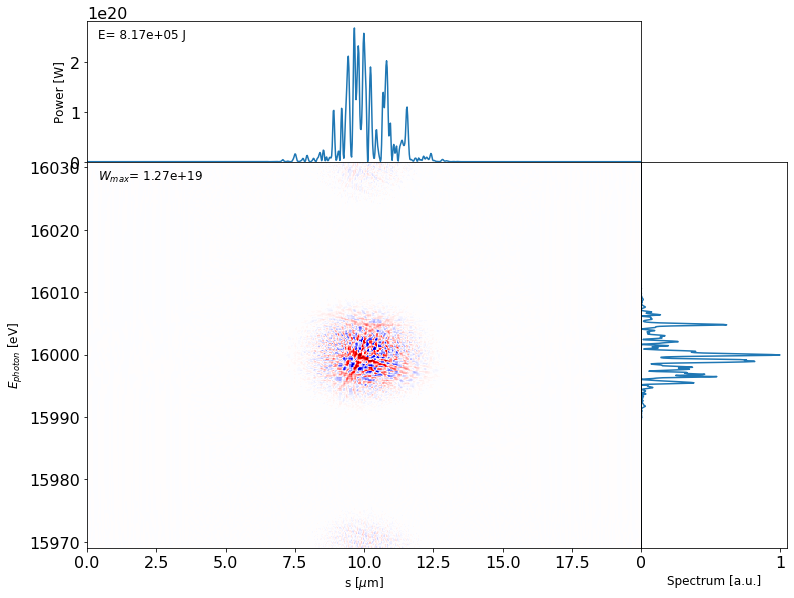

In [3]:
wig = wigner_dfl(dfl)
plot_wigner(wig, downsample=2)

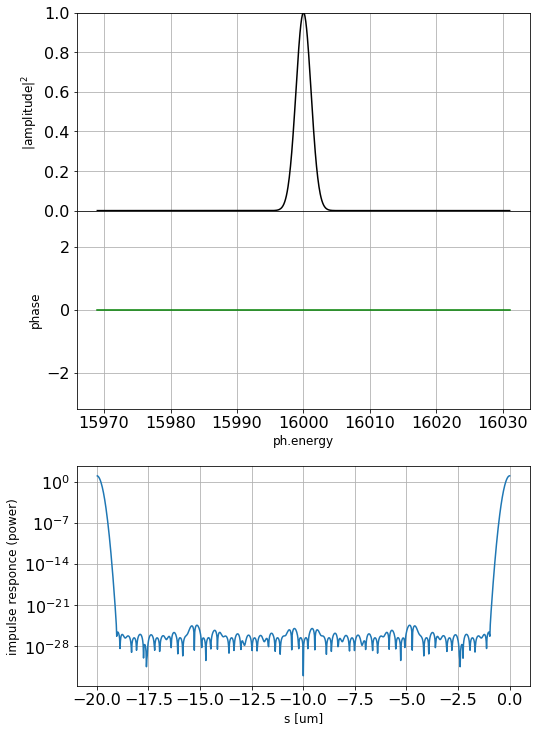

[INFO    ] : : : : multiplying dfl by trf


In [4]:
E_filt = 16000
dEE_filt = 1e-4

trf = TransferFunction()
dfl.to_domain('f')

k0 = 2*np.pi * E_filt / h_eV_s / speed_of_light
delta_k = k0 * dEE_filt

trf.k = dfl.scale_kz()
trf.tr = np.exp(-(trf.k-k0)**2 / 2 / delta_k**2)

plot_trf(trf)

dfl_trf(dfl, trf, 'tr', dump_proj=False)

In [5]:
dfl_trf(dfl, trf, 'tr', dump_proj=False)
dfl.to_domain('t')

[INFO    ] : : : : multiplying dfl by trf


[INFO    ] : : : : calculating Wigner distribution from dfl (on-axis fillament)
[INFO    ] : : : : : plotting Wigner distribution


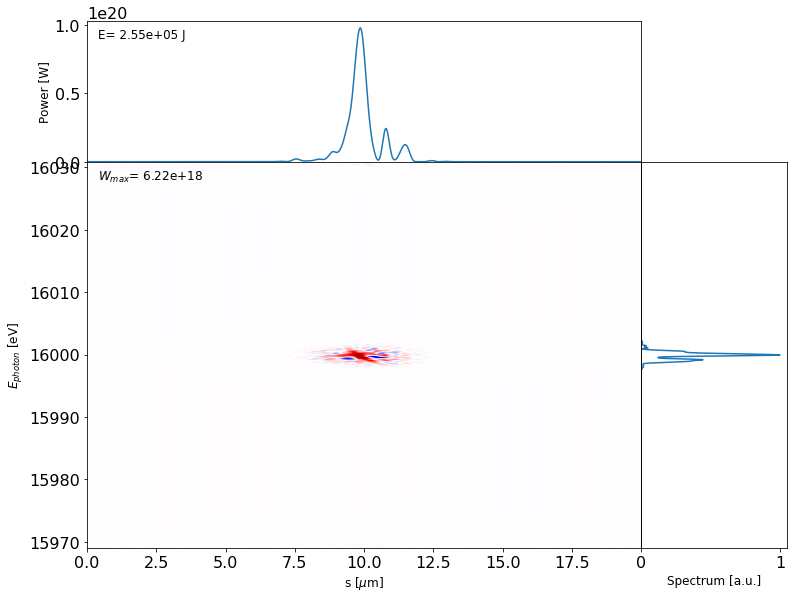

In [6]:
wig = wigner_dfl(dfl)
plot_wigner(wig, downsample=2)